In [1]:
# import pandas as pd
# import os
# import glob
# import concurrent.futures
# import time

# directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 2'
# directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 2'
# cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
# cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# # list of Excel files to read data from
# if os.path.exists(os.path.join(directory, '230201 Payment Summary - 2023-01-31T145747.301.xlsx')):
#     excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
# else:
#     excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
# try:
#     # use cols 0, Barcode; 2, Category Name
#     # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
#     pass
# except FileNotFoundError:
#     # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
#     pass
# # create an empty list to store the dataframes
# # dfs = [] sho

# outputfile =  'dataM2.csv'
# # def excel2csv
# def excel2csv(inputfile, outputfile):
    
#     # Check if exist file_path
#     if not os.path.exists(outputfile):
#         with open(outputfile, 'w') as f:
#             pass

#     # Read the first line of the file
#     with open(outputfile, 'r') as f:
#         first_line = f.readline().strip()
#     # Check if the first line contains the expected column names
#     has_headers = 'InvoiceID' in first_line
#     df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
#     # df2 Category
    
#     # merge with Category, on "Barcode"
#     df = df.merge(df2, on='Barcode', how='left')
    
#     # Check if the first line contains the expected column names
#     df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# # loop through the list of Excel files
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     [executor.submit(excel2csv, file, outputfile) for file in excel_files]
#     # for file in excel_files:
#     #     executor.submit(excel2csv,file)

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
try:
    # Link to data
    df = pd.read_csv(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', dtype=dtypes, on_bad_lines='warn')
except:
    # Link to data
    df = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', dtype=dtypes, on_bad_lines='warn')
df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377868 entries, 0 to 5377867
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 184.6+ MB


In [4]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [5]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
143238,InvoiceID,Barcode,0,0.0,SubCategory Name
407146,VN0001011201230219,2010101000005,0,0.0,Cup Of Ice
407147,VN0001011201230219,8934588233074,0,0.0,Energy Drinks Sub
407145,VN0001011201230219,8935023911137,0,0.0,Energy Drinks Sub
2363221,VN0001011501230059,2010104000118,0,0.0,Cold Local Drinks
...,...,...,...,...,...
4184653,VN0236012501230050,8935001816652,0,0.0,School Supplies
4138219,VN0236012901230021,8934563306847,0,0.0,Instant Noodles Pack
4138225,VN0236012901230024,8935049501527,0,0.0,No/Less Sugar CSD
4262117,VN0236013001230032,8935302600257,0,0.0,Raw material


In [6]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5377863,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5377864,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5377865,VN9996020102230159,8934588063053,1,6364.0,Purified water
5377866,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [34]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [8]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
# df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]


# Calculate the IQR and filter out outliers
# Q1 = np.percentile(df_filtered['Total Exclude VAT'], 25)
# Q3 = np.percentile(df_filtered['Total Exclude VAT'], 75)
# IQR = Q3 - Q1
upper_bound = 500000
lower_bound = 1000
# df_filtered = df_filtered[(df_filtered['Total Exclude VAT'] >= lower_bound) & (df_filtered['Total Exclude VAT'] <= upper_bound)]

group_by_invoice = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))})

group_by_invoice

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
401230091,2702010000077,1,31818.0,Sandwich
VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...
VN9996023001230534,8935049510864,1,6364.0,Purified water
VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"


In [9]:
# filter group_by_invoice by upper_bound and lower_bound
group_by_invoice_filtered = group_by_invoice[(group_by_invoice['Total Exclude VAT'] >= lower_bound) & (group_by_invoice['Total Exclude VAT'] <= upper_bound)]

group_by_invoice_filtered

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
401230091,2702010000077,1,31818.0,Sandwich
VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...
VN9996023001230534,8935049510864,1,6364.0,Purified water
VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"


In [10]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = group_by_invoice_filtered.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(group_by_invoice_filtered['Total Exclude VAT'])
median = statistics.median(group_by_invoice_filtered['Total Exclude VAT'])
mode = group_by_invoice_filtered['Total Exclude VAT'].mode()[0]
std = statistics.stdev(group_by_invoice_filtered['Total Exclude VAT'])
min_val = group_by_invoice_filtered['Total Exclude VAT'].min()
max_val = group_by_invoice_filtered['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", group_by_invoice['Total Exclude VAT'].mode()[0])

Mean: 53047.24491404291
Median: 32727.0
Mode: 10909.0
Standard Deviation: 61848.6304538767
Minimum Value: 1818.0
Maximum Value: 500000.0


In [11]:
# Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 50000, 10000), np.arange(50000, 100000, 25000), np.arange(100000, 350000, 50000), np.arange(100000, 350001, 50000), [350000, 500000, np.inf]))
bins = np.unique(bins)  # Remove duplicate edges
labels = ['{} to {}' .format(i, i+9999) for i in range(0, 50000, 10000)] + ['{} to {}' .format(i, i+24999) for i in range(50000, 100000, 25000)] + ['{} to {}' .format(i, i+49999) for i in range(100000, 300001, 50000)] + ['350000 to 499999', '>=500000']

def grouped_data(df_filtered):

    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(group_by_invoice_filtered)

grouped_data


C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_9016\1178566847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,count,mean,median,Value
Basket Value,,,,
0 to 9999,209983,7529.469195,8182.0,1.581061e+09
10000 to 19999,464752,14945.965859,14545.0,6.946168e+09
20000 to 29999,335476,25122.675226,25454.0,8.428055e+09
30000 to 39999,259206,35011.017747,34546.0,9.075066e+09
40000 to 49999,179369,45144.239116,45454.0,8.097477e+09
50000 to 74999,266262,61401.921182,60909.0,1.634900e+10
75000 to 99999,145382,86522.580609,86190.0,1.257883e+10
100000 to 149999,139182,121192.766263,119091.0,1.686785e+10
150000 to 199999,60705,172382.435649,170909.0,1.046448e+10


c:\Users\Trieu Pham\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


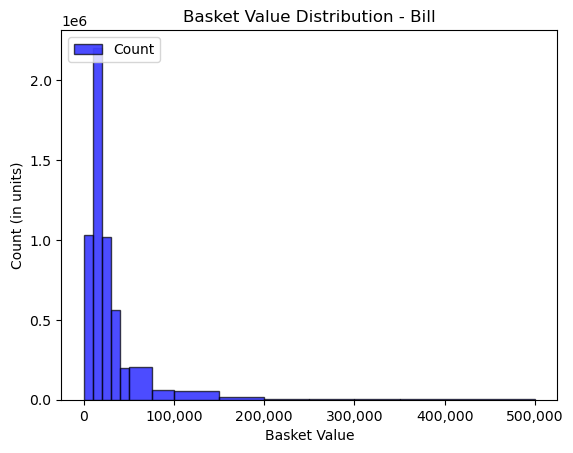

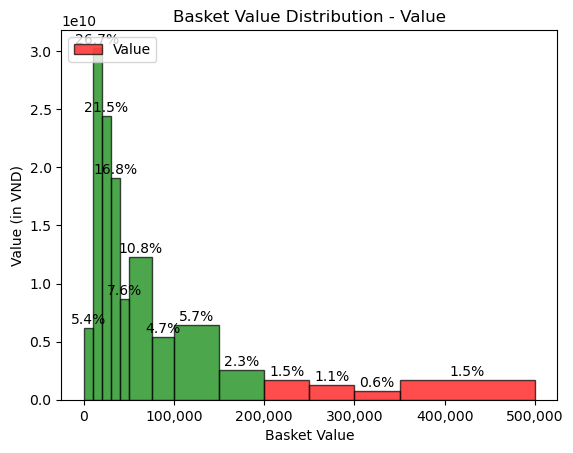

                    Count     Mean   Median         Value  %Value in total
Basket Value                                                              
0 to 9999         209,983    7,529    8,182  1.581061e+09         1.392770
10000 to 19999    464,752   14,946   14,545  6.946168e+09         6.118939
20000 to 29999    335,476   25,123   25,454  8.428055e+09         7.424347
30000 to 39999    259,206   35,011   34,546  9.075066e+09         7.994305
40000 to 49999    179,369   45,144   45,454  8.097477e+09         7.133138
50000 to 74999    266,262   61,402   60,909  1.634900e+10        14.401975
75000 to 99999    145,382   86,523   86,190  1.257883e+10        11.080797
100000 to 149999  139,182  121,193  119,091  1.686785e+10        14.859037
150000 to 199999   60,705  172,382  170,909  1.046448e+10         9.218248
200000 to 249999   31,868  222,347  220,909  7.085748e+09         6.241897
250000 to 299999   18,564  273,309  272,727  5.073714e+09         4.469478
300000 to 349999   12,087

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [13]:
grouped_data.to_csv('groupdataM2.csv')

In [37]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [38]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
# Check if existed columns 'StoreID' and 'BusinessDate' before applying string slicing
if 'StoreID' in df_filtered.columns:
    df_filtered.drop('StoreID', axis=1, inplace=True)
if 'BusinessDate' in df_filtered.columns:
    df_filtered.drop('BusinessDate', axis=1, inplace=True)
df_filtered['StoreID'] = df_filtered['InvoiceID'].map(lambda x: x[:6] if not pd.isna(x) else x)
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].map(lambda x: x[8:14] if not pd.isna(x) else x)

# Dataframe for Category name; use cols 0, Barcode; 2, Category Name
cate_df = pd.read_excel(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\github\python\Python\Data Analysis\DataCate.xlsx', sheet_name='Sheet1', usecols=[0,2])

# Reorder the columns
# df_filtered = df_filtered.reindex (columns=['InvoiceID','StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

df_filtered


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD,VN0001,020123
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks,VN0001,020123
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks,VN0001,020123
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack,VN0001,020123
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks,VN0001,020123
...,...,...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks,VN9996,010223
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub,VN9996,010223
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water,VN9996,010223
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri,VN9996,010223


In [47]:
# Convert Barcode to string
cate_df['Barcode'] = cate_df['Barcode'].astype(str)

# Merge dataframes
merged_df = pd.merge(df_filtered, cate_df, on='Barcode', how='left')

merged_df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate,Category Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD,VN0001,020123,Carbonated Drinks - CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks,VN0001,020123,Snacks for Drinks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks,VN0001,020123,Non-potato Chips
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack,VN0001,020123,Chocolate
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks,VN0001,020123,Non-potato Chips
...,...,...,...,...,...,...,...,...
5372951,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks,VN9996,010223,Non-potato Chips
5372952,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub,VN9996,010223,Energy Drinks
5372953,VN9996020102230159,8934588063053,1,6364.0,Purified water,VN9996,010223,Bottled Water
5372954,VN9996020102230159,2270102000033,1,18182.0,Onigiri,VN9996,010223,Rice Offsite


In [15]:
# Calculate the ADS for each store
grouped_by_store_net = group_by_invoice.groupby('StoreID').agg({'Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net

,Total Exclude VAT,Sum of Qty,BusinessDate,ADS
StoreID,,,,
401230,3.181800e+04,1,1,3.181800e+04
VN0001,7.389153e+08,44420,31,2.383598e+07
VN0002,1.011246e+09,48229,31,3.262083e+07
VN0003,9.517787e+08,52034,31,3.070254e+07
VN0004,5.002319e+08,32005,17,2.942541e+07
...,...,...,...,...
VN0233,2.821556e+08,15123,31,9.101794e+06
VN0234,3.809383e+08,21779,31,1.228833e+07
VN0235,4.428927e+08,25542,31,1.428686e+07


In [16]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [17]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['Basket Value', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


KeyError: 'Basket Value'

In [ ]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

          Basket Value StoreID  count           mean       Value  \
137          0 to 9999  VN0163   5401    7487.110535  40437884.0   
886     40000 to 49999  VN0048    896   45106.123884  40415087.0   
1178    50000 to 74999  VN0138    655   61692.366412  40408500.0   
1253    50000 to 74999  VN0214    653   61696.199081  40287618.0   
1153    50000 to 74999  VN0111    668   60251.675150  40248119.0   
...                ...     ...    ...            ...         ...   
1785  150000 to 199999  VN0103      1  174545.000000    174545.0   
1386    75000 to 99999  VN0133      2   79545.500000    159091.0   
1812  150000 to 199999  VN0133      1  152727.000000    152727.0   
1599  100000 to 149999  VN0133      1  117273.000000    117273.0   
639     30000 to 39999  401230      1   31818.000000     31818.0   

      cumulative_sum  cumulative_percentage  
137     9.889014e+10               0.800058  
886     9.893056e+10               0.800385  
1178    9.897097e+10               0.800712  